11490434/11490434 [==============================] - 3s 0us/step


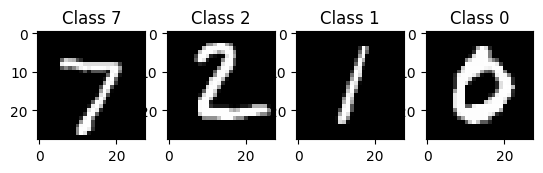

In [1]:
#import subprocess
#import sys
#
#def install(package):
#    subprocess.check_call([sys.executable,"-m","pip","install",package])
#
#
#install('numpy')
#install('keras')


import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Add a channels dimension to the image sets as Akida expects 4-D inputs (corresponding to
# (num_samples, width, height, channels). Note: MNIST is a grayscale dataset and is unusual
# in this respect - most image data already includes a channel dimension, and this step will
# not be necessary.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Display a few images from the test set
f, axarr = plt.subplots(1, 4)
for i in range(0, 4):
    axarr[i].imshow(x_test[i].reshape((28, 28)), cmap=cm.Greys_r)
    axarr[i].set_title('Class %d' % y_test[i])
plt.show()

In [2]:
import keras

#creating the multlayer CNN, which will then be converted to a SNN.
model_keras = keras.models.Sequential([
    keras.layers.Rescaling(1. / 255, input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    # Separable layer
    keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', strides=2),
    keras.layers.Conv2D(filters=64, kernel_size=1, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
], 'mnistnet')

In [3]:
model_keras.summary()

Model: "mnistnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 13, 13, 32)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 7, 7, 32)         320       
 Conv2D)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          211

In [4]:
from keras.optimizers import Adam
#optimizes the algorithm to attain convergence. changing the learning rate
model_keras.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy'])

_ = model_keras.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1697 - accuracy: 0.9481 - val_loss: 0.0718 - val_accuracy: 0.9828
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.0753 - val_accuracy: 0.9792
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.0550 - val_accuracy: 0.9863
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0693 - val_accuracy: 0.9810
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0730 - val_accuracy: 0.9818
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.0756 - val_accuracy: 0.9818
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0746 - val_accuracy:

In [5]:
#import subprocess
#import sys
#
#def install(package):
#    subprocess.check_call([sys.executable,"-m","pip","install",package])
#
#install('quantizeml')

from quantizeml.models import quantize, QuantizationParams


qparams = QuantizationParams(input_weight_bits=2, weight_bits=2, activation_bits=2)
model_quantized = quantize(model_keras, qparams=qparams)
model_quantized.summary()

C:\Users\msaad\AppData\Roaming\Python\Python38\site-packages\quantizeml\models\quantize.py:449: UserWarning: Quantizing per-axis with random calibration samples is not accurate.                       Set QuantizationParams.per_tensor_activations=True when calibrating with                        random samples.
  warnings.warn("Quantizing per-axis with random calibration samples is not accurate.\


1024/1024 [==============================] - 1s 653us/step
Model: "mnistnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 rescaling (QuantizedRescali  (None, 28, 28, 1)        0         
 ng)                                                             
                                                                 
 conv2d (QuantizedConv2D)    (None, 13, 13, 32)        320       
                                                                 
 re_lu (QuantizedReLU)       (None, 13, 13, 32)        64        
                                                                 
 depthwise_conv2d (Quantized  (None, 7, 7, 32)         384       
 DepthwiseConv2D)                                                